# 1.以Dialogflow實現多輪對話

### (請參考slide"Google Dialogflow 簡介"完成實作)

### Ans: Implemented Diagflow small talk with Linebot

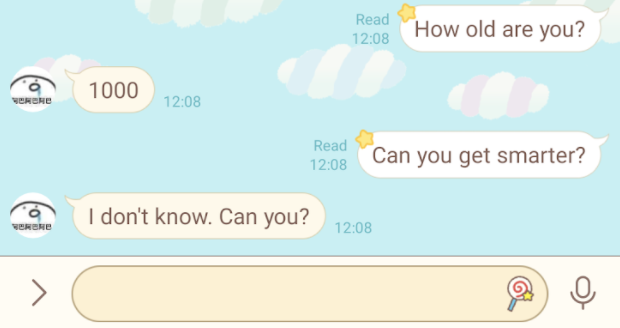

# 2.Linebot設計

### (請參考slide"Linebot 基本設定"完成Linebot串接)

In [ ]:
pip install line-bot-sdk

     |████████████████████████████████| 81kB 140kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from __future__ import unicode_literals
import os, requests, json, configparser
from flask import Flask, request, abort
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import *

app = Flask(__name__)

# LINE 聊天機器人的基本資料
config = configparser.ConfigParser()
config.read('config.ini')

line_bot_api = LineBotApi(config.get('line-bot', 'channel_access_token'))
handler = WebhookHandler(config.get('line-bot', 'channel_secret'))

# 接收 LINE 資訊
@app.route("/callback", methods=['POST'])
def callback():
    signature = request.headers['X-Line-Signature']
    body = request.get_data(as_text=True)
    app.logger.info("Request body: " + body)

    try:
        print("body:",body)
        print("signature:", signature)
        print("===")
        handler.handle(body, signature)
    except InvalidSignatureError:
        abort(400)
    return 'OK'

# 回覆設定 (defaul僅能回固定語句)
@handler.add(MessageEvent, message=TextMessage)
def get_response(event):
    query = event.message.text   
    line_bot_api.reply_message(event.reply_token, TextSendMessage(text="不論你說什麼 我都回你好!"))

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


body: {"destination":"Ub52521f51a473d8c24ff40e03c49fb67","events":[{"type":"message","message":{"type":"text","id":"14712777019081","text":"Hi"},"timestamp":1631110696509,"source":{"type":"user","userId":"Ue082d945d7d80921b5714e9c417583eb"},"replyToken":"71260889584c42a48fb638db5c267529","mode":"active"}]}
signature: bvJCVTvtX9R7dvYNKOUxyLwIYTcPT9BdrpZoH72XRLA=
===


127.0.0.1 - - [08/Sep/2021 22:18:17] "POST /callback HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2021 22:18:32] "POST /callback HTTP/1.1" 200 -


body: {"destination":"Ub52521f51a473d8c24ff40e03c49fb67","events":[{"type":"message","message":{"type":"text","id":"14712778138605","text":"Test message 1"},"timestamp":1631110710965,"source":{"type":"user","userId":"Ue082d945d7d80921b5714e9c417583eb"},"replyToken":"7bd1a1577ccf4c43b7e85bbca20ce149","mode":"active"}]}
signature: N40V7YaJUbud9WbUiht3M0rRgR2HIqvG9v14/0TGI54=
===


# Implementation: 
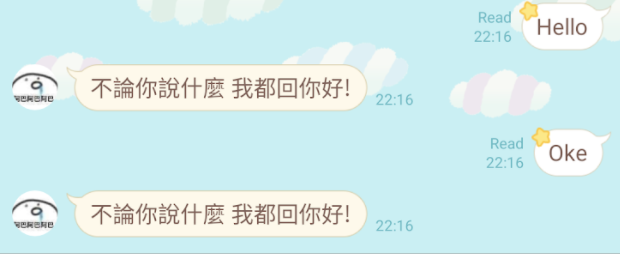

# 3.以Python實現多輪對話

## 3-1.建立高鐵API函式

In [ ]:
# 其他API呼叫方式請參考 => https://ptx.transportdata.tw/MOTC/?t=Rail&v=2

In [ ]:
!pip install pandas_datareader
!pip install yfinance

     |████████████████████████████████| 4.5MB 4.2MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23907 sha256=13689379736bc3bb7d6f50a393d3f112540609d50fbd4acfd083b367f8ad6c70
  Stored in directory: /Users/randy/Library/Caches/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
  Created wheel for multitasking: filename=multitasking-0.0.9-cp37-none-any.whl size=8368 sha256=690900c95760f644c0d5f086b4150bad300057203dd4006747e0ecf514a9110b
  Stored in directory: /Users/randy/Library/Caches/pip/wheels/37/fa/73/d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking
  Found existing installation: lxml 4.4.1
    Uninstalling lxml-4.4.1:
      Successfully uninstalled lxml-4.4.1


## 3-2.建立多輪判斷邏輯

### task: 當query包含"身高"、"體重"、"年齡"、"收入"等隱私時，回覆熊大問號貼圖

###implementation: 
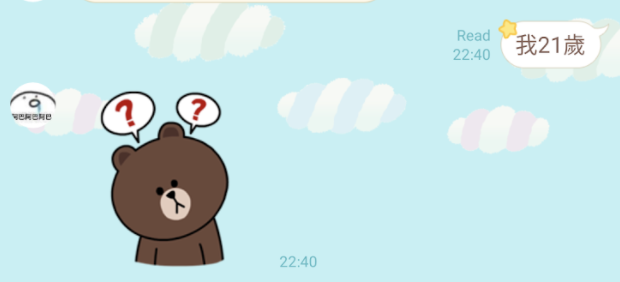

In [ ]:
from __future__ import unicode_literals
import os, requests, json, configparser
from flask import Flask, request, abort
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import *

app = Flask(__name__)

# LINE 聊天機器人的基本資料
config = configparser.ConfigParser()
config.read('config.ini')

line_bot_api = LineBotApi(config.get('line-bot', 'channel_access_token'))
handler = WebhookHandler(config.get('line-bot', 'channel_secret'))

# 接收 LINE 資訊
@app.route("/callback", methods=['POST'])
def callback():
    signature = request.headers['X-Line-Signature']
    body = request.get_data(as_text=True)
    app.logger.info("Request body: " + body)

    try:
        print("body:",body)
        print("signature:", signature)
        print("===")
        handler.handle(body, signature)
    except InvalidSignatureError:
        abort(400)
    return 'OK'

# 回覆設定 (defaul僅能回固定語句)
@handler.add(MessageEvent, message=TextMessage)
def get_response(event):
    query = event.message.text
    sensitive = ['身高', '公分','體重','年齡','歲','公斤','收入','元']
    for i in query:
        if i in sensitive:
            line_bot_api.reply_message(event.reply_token, StickerSendMessage(package_id=2, sticker_id=149))

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Sep/2021 11:32:17] "POST /callback HTTP/1.1" 200 -


body: {"destination":"Ub52521f51a473d8c24ff40e03c49fb67","events":[{"type":"message","message":{"type":"text","id":"14715339019691","text":"Hello"},"timestamp":1631158336653,"source":{"type":"user","userId":"Ue082d945d7d80921b5714e9c417583eb"},"replyToken":"ffdf40afd79842aa9a88adf69577ecca","mode":"active"}]}
signature: 30OrKYmO4cLLzQYM7uzuVZAwlX/IokI78KEFgjQm1rY=
===


127.0.0.1 - - [09/Sep/2021 11:32:36] "POST /callback HTTP/1.1" 200 -


body: {"destination":"Ub52521f51a473d8c24ff40e03c49fb67","events":[{"type":"message","message":{"type":"text","id":"14715340687425","text":"身高156"},"timestamp":1631158355253,"source":{"type":"user","userId":"Ue082d945d7d80921b5714e9c417583eb"},"replyToken":"70217eca334243c783e0ad1c7c504aa2","mode":"active"}]}
signature: AzHRGkk4JofYZ+KY0e56vltct+dLLdoBEO+/uuqcQBQ=
===
body: {"destination":"Ub52521f51a473d8c24ff40e03c49fb67","events":[{"type":"message","message":{"type":"text","id":"14715342394151","text":"21歲"},"timestamp":1631158374261,"source":{"type":"user","userId":"Ue082d945d7d80921b5714e9c417583eb"},"replyToken":"a8b543c28dfa417695cafc6f6add6ac9","mode":"active"}]}
signature: rcsl3bNQQ4UmHCG85cnr+xKexoD/0+6H20x4NV4S5kY=
===


127.0.0.1 - - [09/Sep/2021 11:32:56] "POST /callback HTTP/1.1" 200 -


# 判斷使用者intent，查詢高鐵或股票資訊

### Implementation - THSR (Taiwan High Speed Rail information): 
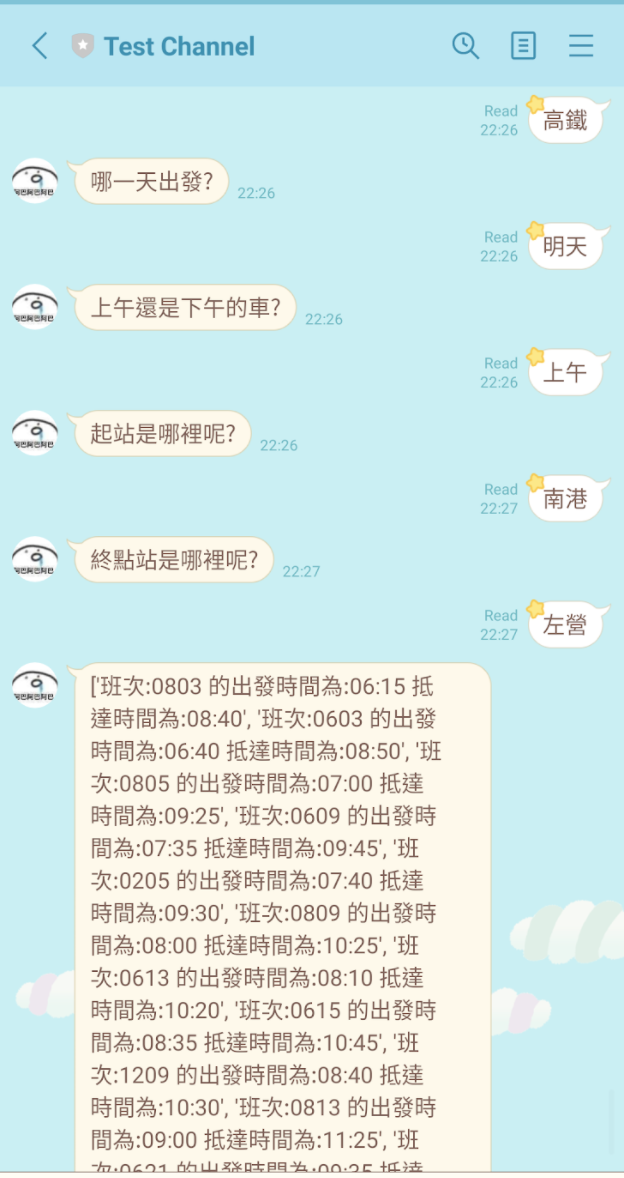


### Implementation - Stock information getter

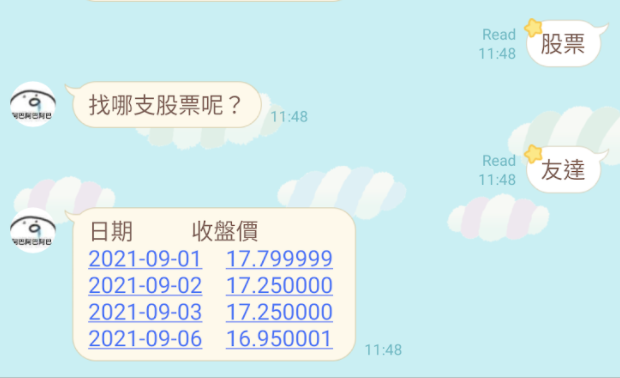

In [ ]:
from __future__ import unicode_literals
import os, requests, json, configparser
from flask import Flask, request, abort
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import *

import stock_utils as Stock
import thsr_utils as Thsr
thsr = Thsr.ThsrModule()

chat_record = []
thsr_res = {"starting":"", "ending":"", "date":"", "ampm":""}
station_names = Thsr.station_name
date_keys = Thsr.date_key
ampm_keys = Thsr.ampm_key


app = Flask(__name__)

# LINE 聊天機器人的基本資料
config = configparser.ConfigParser()
config.read('config.ini')

line_bot_api = LineBotApi(config.get('line-bot', 'channel_access_token'))
handler = WebhookHandler(config.get('line-bot', 'channel_secret'))

# 接收 LINE 資訊
@app.route("/callback", methods=['POST'])
def callback():
    signature = request.headers['X-Line-Signature']
    body = request.get_data(as_text=True)
    app.logger.info("Request body: " + body)

    try:
        print("body:",body)
        print("signature:", signature)
        print("===")
        handler.handle(body, signature)
    except InvalidSignatureError:
        abort(400)
    return 'OK'

# 回覆設定 (加入高鐵API多輪對話)
@handler.add(MessageEvent, message=TextMessage)
def get_response(event):
    query = event.message.text       
    
    if len(chat_record) < 5:
        chat_record.append(query)
    else:
        chat_record.pop(0)
        chat_record.append(query)
    print("chat_record:",chat_record)


    # 判斷是否為"高鐵查詢意圖" - THSR information replies
    if query == "高鐵":
        line_bot_api.reply_message(event.reply_token, TextSendMessage(text="哪一天出發?"))
    try:
        if chat_record[-2] == "高鐵" and any(chat_record[-1] == i for i in date_keys):
            date_format = thsr.get_date_string_today(chat_record[-1])
            thsr_res['date'] = date_format
            line_bot_api.reply_message(event.reply_token, TextSendMessage(text="上午還是下午的車?"))

        elif any(chat_record[-2] == i for i in date_keys) and any(chat_record[-1] == i for i in ampm_keys):
            thsr_res['ampm'] = chat_record[-1]
            line_bot_api.reply_message(event.reply_token, TextSendMessage(text="起站是哪裡呢?"))

        elif any(chat_record[-2] == i for i in ampm_keys) and any(chat_record[-1] == i for i in station_names):
            startind_id = Thsr.station_id[chat_record[-1]]
            thsr_res['starting'] = startind_id
            line_bot_api.reply_message(event.reply_token, TextSendMessage(text="終點站是哪裡呢?"))

        elif any(chat_record[-2] == i for i in station_names) and any(chat_record[-1] == i for i in station_names):
            ending_id = Thsr.station_id[chat_record[-1]]
            thsr_res['ending'] = ending_id

            # print("***",thsr_res['starting'],thsr_res['ending'],thsr_res['date'],thsr_res['ampm'])
            text = thsr.get_runs(thsr_res['starting'],thsr_res['ending'],thsr_res['date'],thsr_res['ampm'])
            line_bot_api.reply_message(event.reply_token, TextSendMessage(text=text))

    except IndexError:
        pass
    
    if query == "股票": # Stock info replies
        line_bot_api.reply_message(event.reply_token, TextSendMessage(text = "找哪支股票呢？"))
    try:
        if "股票" in chat_record:
            symbol = Stock.stock_symbol
            if any(sk == query for sk in list(symbol.keys())):
                   stock_symbol = symbol[query]
                   data = Stock.get_stockdata(stock_symbol, '2021-09-01','2021-09-07')
                   close_info = Stock.get_stockinfo(query, data, 'Close')
                   line_bot_api.reply_message(event.reply_token, TextSendMessage(text = close_info))
    except:
        pass
    
         
    line_bot_api.reply_message(event.reply_token, TextSendMessage(text="不論你說什麼 我都回你好!"))

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


body: {"destination":"Ub52521f51a473d8c24ff40e03c49fb67","events":[{"type":"message","message":{"type":"text","id":"14715427881993","text":"股票"},"timestamp":1631159330539,"source":{"type":"user","userId":"Ue082d945d7d80921b5714e9c417583eb"},"replyToken":"949863c90a664b7fa7a2a42e6839c332","mode":"active"}]}
signature: +AzV4K4Po+nf2QypOvVqc5NcufHJ3t8fEqNJENbHNnA=
===
chat_record: ['股票']


[2021-09-09 11:48:52,604] ERROR in app: Exception on /callback [POST]
Traceback (most recent call last):
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<

body: {"destination":"Ub52521f51a473d8c24ff40e03c49fb67","events":[{"type":"message","message":{"type":"text","id":"14715428502586","text":"友達"},"timestamp":1631159337388,"source":{"type":"user","userId":"Ue082d945d7d80921b5714e9c417583eb"},"replyToken":"b5cbf50898f24e81b43daebcb43af772","mode":"active"}]}
signature: e6pert3cihXp9qfRJi/X7qiWp7JoR/P1EJqwmn/oJKQ=
===
chat_record: ['股票', '友達']
[*********************100%***********************]  1 of 1 completed


[2021-09-09 11:48:59,503] ERROR in app: Exception on /callback [POST]
Traceback (most recent call last):
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/randy/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<

# Toolbox function: stock info getter

In [ ]:
# 匯入套件
from pandas_datareader import data as web
import yfinance as yf
import datetime as dt
import pandas as pd

stock_symbol = {"友達":2409, "鴻海":2317, "長榮":2603, "日月光投控":3711, "晨訊科-DR":912000}

# 取得yahoo股價
def get_stockdata(stock, t_start, t_end):
    yf.pdr_override()
    raw = 'stockdata.csv'

    ts = t_start.split("-")
    ts_y, ts_m, ts_d = int(ts[0]), int(ts[1]), int(ts[2])
    te = t_end.split("-")
    te_y, te_m, te_d = int(te[0]), int(te[1]), int(te[2])

    start = dt.datetime(ts_y, ts_m, ts_d)  # duration
    end = dt.datetime(te_y, te_m, te_d)
    df = web.get_data_yahoo([str(stock) + '.TW'], start, end)  # realtime
    df.to_csv(raw)

    return pd.read_csv(raw, parse_dates=True, index_col='Date')

#取得收盤價
def get_stockinfo(stock_name, stock_data, price_category):
    price = stock_data[price_category]
    res = price.head()
    res = str(res).replace("Name: Close, dtype: float64","").replace("Date","").strip("\n")
    return "日期" + " "*10 + "收盤價\n" + res

if __name__ == '__main__':

    stocks = [
        (2409,"友達"),
        (2317,"鴻海"),
        (2603,"長榮"),
        (3711,"日月光投控"),
        (912000,"晨訊科-DR")
    ]
    for stock_symbol, stock_name in stocks:
        stock_data = get_stockdata(stock_symbol, "2020-12-02", "2020-12-04")
        stock_info = get_stockinfo(stock_name, stock_data, "Close")
        print(stock_info)
        print("===")

# Toolbox function: THSR (Taiwan High Speed Rail) info getter

In [ ]:
import hmac, base64, datetime
from wsgiref.handlers import format_date_time
from hashlib import sha1
from time import mktime
from requests import request


# 請使用自行申請之 app_id 及 app_key
app_id = 'db8c0b51468c4361823fa5dbfd193417'
app_key = '1J4d_VxhTbejK7G1gUgIPsvYzOs'

# 車站代號對照 
station_name = ['南港', '台北', '板橋', '桃園', '新竹', '苗栗', '台中', '彰化', '雲林', '嘉義', '台南', '左營']
station_id = {'南港': '0990', '台北': '1000', '板橋': '1010', '桃園': '1020', '新竹': '1030', '苗栗': '1035', '台中': '1040', '彰化': '1043', '雲林': '1047', '嘉義': '1050', '台南': '1060', '左營': '1070'}

# 乘車時間轉換
today = ["今天", "今日", "本日"]
tomorrow = ["明天", "明日"]
day_af_tomorrow = ["後天"]
days_af_tomorrow = ["大後天"]
date_key = today + tomorrow + day_af_tomorrow + days_af_tomorrow
am = ["上午", "中午以前", "中午之前", "早上", "白天"]
pm = ["下午", "中午以後", "中午之後", "晚上"]
ampm_key = am + pm

# 建立模組
class ThsrModule():

    def __init__(self):
        self.app_id = app_id
        self.app_key = app_key
        
    # 建立資料傳輸之hash值及完成header設定
    def get_auth_header(self):
        xdate = format_date_time(mktime(datetime.datetime.now().timetuple()))
        hashed = hmac.new(self.app_key.encode('utf8'), ('x-date: ' + xdate).encode('utf8'), sha1)
        signature = base64.b64encode(hashed.digest()).decode()

        authorization = 'hmac username="' + self.app_id + '", ' + \
                        'algorithm="hmac-sha1", ' + \
                        'headers="x-date", ' + \
                        'signature="' + signature + '"'
        return {
            'Authorization': authorization,
            'x-date': format_date_time(mktime(datetime.datetime.now().timetuple())),
            'Accept - Encoding': 'gzip'
        }
    
    # 關鍵字判斷乘車時間
    def get_date_string_today(self,time_keywords):
        now = datetime.datetime.now()
        if any(keyword == time_keywords for keyword in today):
            pass
        elif any(keyword == time_keywords for keyword in tomorrow):
            now = now + datetime.timedelta(days=1)
        elif any(keyword == time_keywords for keyword in day_af_tomorrow):
            now = now + datetime.timedelta(days=2)
        elif any(keyword == time_keywords for keyword in days_af_tomorrow):
            now = now + datetime.timedelta(days=3)
        else:
            pass
        return now.strftime("%Y-%m-%d")

    # 取得班次資訊
    def get_runs(self, starting, ending, date, ampm):
        runs_info = request('get',
                           'https://ptx.transportdata.tw/MOTC/v2/Rail/THSR/DailyTimetable/OD/{}/to/{}/{}?$top=30&$format=JSON'.format(starting,ending,date),
                           headers=self.get_auth_header())

        res_am, res_pm = [], []
        for ri in runs_info.json():
            train_no = ri["DailyTrainInfo"]["TrainNo"]
            start_time = ri["OriginStopTime"]['ArrivalTime']
            arrival_time = ri["DestinationStopTime"]['ArrivalTime']
            run = "班次:{} 的出發時間為:{} 抵達時間為:{}\n".format(train_no, start_time, arrival_time)
            if int(start_time[:2]) < 12:
                res_am.append(run)
            else:
                res_pm.append(run)

        if any(ampm == i for i in am):
            return str(res_am)
        elif any(ampm == i for i in pm):
            return str(res_pm)

        else:
            return None



if __name__ == '__main__':
    thsr = ThsrModule()
    runs = thsr.get_runs("0990", "1070", "2020-12-25", "上午")
    print(runs)